# Computational Methods in Economics

## Lecture 2 - Solving Systems of Linear Equations

In [79]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-10-27 16:35:41.242004


Missing:
- add explanation for pivoting following the notes on PA=LU factorization
- add documentation for ill-conditioned matrices
- Sparse matrices

### Preliminaries

#### Import Modules

In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import numpy as np
import scipy.optimize
import scipy.linalg

# import sys
from importlib import reload

--------------------------------------------------------------------------------------------------------------------------------

## Review: Matrices

Let $A$ be a m-by-n matrix:
\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{m1} & a_{m2} & \cdots & a_{mn}
\end{array}
\right]\end{split}

A n-by-n matrix is called a *square* matrix of order $n$:
\begin{split}A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    a_{21} & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $D$ of order $n$ is *diagonal* if all its non-zero elements are on its diagonal (i.e. the entries $a_{ij}$ with $i = j$):
\begin{split}D =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    0 & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $L$ of order $n$ is *lower triangular* if all its non-zero elements are either diagonal entries or *strictly lower triangular* entries (i.e. the entries $a_{ij}$ for which $i > j$):
\begin{split}L =
\left[
\begin{array}{cccc}
    a_{11} & 0 & \cdots & 0 \\
    a_{21} & a_{22} & \cdots & 0 \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{array}
\right]\end{split}

A matrix $U$ of order $n$ is *upper triangular* if all its non-zero elements are either diagonal entries or *strictly upper triangular* entries (i.e. the entries $a_{ij}$ for which $i < j$):
\begin{split}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

### Matrices in Python

In Python, matrices are best coded as *Numpy arrays*:

In [4]:
## define matrix
A = np.array([[2, 0, -1, 2],
              [4, 2, -1, 4],
              [2, -2, -2, 3],
              [-2, 2, 7, -3]])
print(A)

[[ 2  0 -1  2]
 [ 4  2 -1  4]
 [ 2 -2 -2  3]
 [-2  2  7 -3]]


In [5]:
## get dimension of matrix
print( A.shape )

(4, 4)


In [6]:
## access elements by indices
print(A[2,1])
print(A[3,2])

-2
7


Recall that the **transpose** $A'$ (or $A^T$) of matrix $A$ is formed by replacing $a_{ij}$ with $a_{ji}$ for every $i$ and $j$. If $A = A'$, the matrix is **symmetric**. 

In [7]:
## transpose matrix
print(A.T)

[[ 2  4  2 -2]
 [ 0  2 -2  2]
 [-1 -1 -2  7]
 [ 2  4  3 -3]]


Matrix addition and scalar multiplication are straightforward:

In [9]:
## scalar multiplication
B = 3 * A
print(B)

[[ 6  0 -3  6]
 [12  6 -3 12]
 [ 6 -6 -6  9]
 [-6  6 21 -9]]


In [10]:
## matrix addition
print( A + B)

[[  8   0  -4   8]
 [ 16   8  -4  16]
 [  8  -8  -8  12]
 [ -8   8  28 -12]]


Recall that multiplying two matrices $A$ and $B$, their product $A \cdot B$ is formed by computing the *inner product* of the $i$th row of $A$ and the $j$th column of $B$, and assigning the result to the $i,j$th element. Matrix multiplication in Python is implemented using **@**:

In [11]:
## matrix multiplication
print( A @ B )

[[  -6   18   42  -15]
 [  18   42   72    3]
 [ -42   18   75  -57]
 [  72  -48 -105  102]]


Note that $AB$ and $BA$ are in general not the same. Also recall that multiplying a matrix $A$ with the identity matrix gives $A$.

In [12]:
## with identity matrix
print( np.eye(4) @ A )

[[ 2.  0. -1.  2.]
 [ 4.  2. -1.  4.]
 [ 2. -2. -2.  3.]
 [-2.  2.  7. -3.]]


When multiplying a matrix and a vector, make sure that the vector has the right dimension -"flat" arrays work either way!

In [14]:
x = np.array([1, 2, 3, 4])
print(A @ x)
print(x @ A)

[ 7 21  4 11]
[ 8  6 19  7]


In [15]:
## "row vector" (1-by-4)
x = np.array([[1, 2, 3, 4]])
print(x @ A) 
# print(A @ x) # this one won't work!

[[ 8  6 19  7]]


In [16]:
## "column vector" (4-by-1)
x = np.array([[1], [2], [3], [4]])
print(A @ x) 
# print(x @ A) # this one won't work!

[[ 7]
 [21]
 [ 4]
 [11]]


--------------------------------------------------------------------------------------------------------------------------------

## Review: Span and Linear Independence

For what follows below, it is useful to review the definition of linear independence of a collection of *vectors*. For this, we first need to define a *span*.

#### Span

Let $A$ be a collection of (column) vectors: $A = \{ a_1, a_2, ..., a_n \}$ where
\begin{split}a_j =
\left[
\begin{array}{c}
    a_{1j} \\
    a_{2j}  \\
    \vdots \\
    a_{mj} 
\end{array}
\right] \in \mathbb{R}^m \end{split}

$y \in \mathbb{R}^m$ is a **linear combination** of $A$ if 
\begin{equation}
    y = \beta_1 a_1 + \beta_2 a_2 + ... + \beta_n a_n
\end{equation}
for some (scalar) coefficients $\beta_1, ..., \beta_n$. 

The set of *all* linear combinations of $A$ is called the **span** of $A$. In other words, the span is the set of vectors that can be created by applying vector addition and scalar multiplications on the vectors in $A$.

A special case is the set of *canonical vectors* $A = \{ e_1, e_2, ..., e_n \}$ where

\begin{split}e_1 =
\left[
\begin{array}{c}
    1 \\
    0  \\
    \vdots \\
    0 
\end{array}
\right],\ e_2 =
\left[
\begin{array}{c}
    0 \\
    1  \\
    \vdots \\
    0 
\end{array}
\right],\ ...\ \in \mathbb{R}^n \end{split}

In this case, the span of $A$ is $\mathbb{R}^n$: for any $y = (y_1, ..., y_n) \in \mathbb{R}^n$, we can write 

\begin{equation}
    y = y_1 e_1 + ... + y_n e_n.
\end{equation}

#### Linear Independence

A collection of vectors $A = \{ a_1, a_2, ..., a_n \}$ in $\mathbb{R}^m$ is 
- **linearly dependent** if some strict subset of $A$ has the same span as $A$
- **linearly independent** if it is not linearly dependent
In other words, a set of vectors is linearly independent if none of the vectors is redundant to the span.

Moreover, the following is true for a linearly independent set of vectors $A$:
1. no vector in $A$ can be formed as a linear combination of the other vectors
2. if 
\begin{equation} 
     \beta_1 a_1 + \beta_2 a_2 + ... + \beta_n a_n = 0,
\end{equation}
then $\beta_1 = ... = \beta_n = 0$.
3. if
\begin{equation}
    y = \beta_1 a_1 + \beta_2 a_2 + ... + \beta_n a_n,
\end{equation}
then no other coefficient sequence $\gamma_1, ... , \gamma_n$ will produce the same vector $y$.

Linear independence is useful, since it implies that the set of vectors have a "large span". 

--------------------------------------------------------------------------------------------------------------------------------

## Review: Nonsingular vs. singular matrix

As you may recall from your linear algebra class, an important feature of a square matrix is whether or not it is *invertible*. An invertible matrix is also called *non-singular*, while a *singular* matrix cannot be inverted. 

This concept is closely related to linear independence of a collection of vectors. If the column vectors of a square matrix are linearly independent, it has **full column rank** (an analogous definition exists for the row vectors). A matrix $A$ is nonsingular if and only if it has full column rank.

An alternative way to check whether a square matrix has an inverse is computing its **determinant** (I skip the definition here, but feel free to look it up if you don't remember). A matrix $A$ is nonsingular if and only if its determinant is not zero. In other words, a square matrix with linearly independent column vectors has a non-zero determinant.

#### In Python

Numpy's **linalg** module has functions to compute the determinant (**det()**) and the rank (**matrix_rank()**) of a matrix, as well as for inverting a matrix (**inv()**):

In [24]:
A = np.array([[2, 0, -1, 2],
              [4, 2, -1, 4],
              [2, -2, -2, 3],
              [-2, 2, 7, -3]])

## compute the determinant of a matrix
print( np.linalg.det(A) )

-20.0


In [25]:
## compute the rank of a matrix
print( np.linalg.matrix_rank(A) )
print( np.linalg.matrix_rank(A.T) )

4
4


In [26]:
## compute the inverse of a matrix
print( np.linalg.inv(A) )

[[  3.50000000e+00  -1.00000000e+00  -9.00000000e-01   1.00000000e-01]
 [ -1.00000000e+00   5.00000000e-01  -1.00000000e-01  -1.00000000e-01]
 [  0.00000000e+00   0.00000000e+00   2.00000000e-01   2.00000000e-01]
 [ -3.00000000e+00   1.00000000e+00   1.00000000e+00  -1.66533454e-17]]


In [20]:
X = np.array([[0, 1],
              [0, 2]])

print(np.linalg.det(X))
print(np.linalg.matrix_rank(X))
print(np.linalg.matrix_rank(X.T))

0.0
1
1


C:\Users\schmitt\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1776: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [19]:
A = np.array([[1, 0, 0],
              [4, 0, 0],
              [2, 3, 5]])

np.linalg.det(A)

0.0

--------------------------------------------------------------------------------------------------------------------------------

## System of Linear Equations

A system of $m$ linear equations in $n$ unknowns $x_1, x_2, ... , x_n$ is written as:
\begin{split}
    \begin{array}{c}
    a_{11} x_1 + \cdots + a_{1n} x_n = b_1\\
    \vdots \\
    a_{m1} x_1 + \cdots + a_{mn} x_n = b_m
\end{array}
\end{split}

Let $x$ be a n-by-1 vector: $x = [x_1, x_2, ... , x_n]'$. Then, the system can be written in matrix form as $Ax = b$, since

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{m1} &  \cdots & a_{mn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
&=
\left[
\begin{array}{c}
    a_{11} x_1 + \cdots + a_{1n} x_n \\
    \vdots \\
    a_{m1} x_1 + \cdots + a_{mn} x_n
\end{array}
\right]
 = 
\left[
\begin{array}{c}
    b_{1}  \\
    \vdots \\
    b_{m} 
\end{array}
\right]
\end{split}
\end{equation} 

The problem we face is to find $x \in \mathbb{R}^n$ that solves the expression above for a given $A$ and $b$. An important question is whether such an $x$ exists and whether it is unique.

Before dealing with these question, why are SLEs (and being able to solve them) important? SLE arise in many computational economics problems, either directly or indirectly. 
- the prime example for a problem that directly involves a SLE is computing equilibrium prices and quantities in a model with multiples goods and linear demand and supply functions (see below);
- solving SLEs is part of numerous algorithms when analyzing more complicated, non-linear problems; we will get to examples later in this course.

#### Existence and Uniqueness


To see what properties of $A$ give us existence and uniqueness, first note the following:

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{m1} &  \cdots & a_{mn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
&=
x_1\left[
\begin{array}{c}
    a_{11} \\
    \vdots \\
    a_{m1} 
\end{array}
\right]  +
...
+ x_n\left[
\begin{array}{c}
    a_{1n}  \\
    \vdots \\
    a_{mn} 
\end{array}
\right] 
\end{split}
\end{equation} 

In words, $Ax$ can be written as a linear combination of the set of the column vectors in $A$, $\{ a_1, a_2, ..., a_n \}$ where
\begin{split}a_j =
\left[
\begin{array}{c}
    a_{1j} \\
    a_{2j}  \\
    \vdots \\
    a_{mj} 
\end{array}
\right] \in \mathbb{R}^m \end{split}
and where the coefficients are given by $x = (x_1, ... , x_n)$.

Hence, for any $x \in \mathbb{R}^n$, $y = Ax$ is in the span of the column vectors of $A$. Put differently, if you define function $f$ such that $f(x) = Ax$, the range of $f$ is the span of the columns of $A$. 


#### Square Matrices

Let $A$ be an n-by-n matrix. The system of linear equations has exactly as many unknown variables as the number of equation:
\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1n} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
 = 
\left[
\begin{array}{c}
    b_{1}  \\
    \vdots \\
    b_{n} 
\end{array}
\right]
\end{split}
\end{equation} 

Consider the case that the column vectors in $A$ are linearly independent. Then, we know that:
- since we need $n$ linearly independent vectors in $\mathbb{R}^n$ to span $\mathbb{R}^n$, the span of the columns of $A$ is $\mathbb{R}^n$; hence, there must *exist* a vector $x$ such that $Ax = b$ for any $b \in \mathbb{R}^n$,
- since no other vector $y$ will satisfy $Ay = b$ (see above), $x$ is *unique*

Hence, if the columns of a square matrix $A$ are linearly independent ($A$ has full column rank), the system of linear equations $Ax = b$ has a unique solution. Hence, we can compute the determinant or the column rank of $A$ in order to check for existence and uniqueness of a solution for a square SLE. 

Moreover, knowing that the inverse of $A$ exists, we can also compute the solution to the SLE as
\begin{equation}
    x = A^{-1} b
\end{equation}

#### More Rows than Columns

Next, consider the case where $A$ is not a square matrix, and the number of rows exceed the number of columns ($m > n$). This is the case that applies to OLS regression in econometric analysis: the number of observations $m$ is typically much higher than the number of regressors ($n$). 

In this case, it is *very unlikely that a solution to $Ax = b$ exists*. To get some intuition, let $m = 3$ and $n = 2$, and let  

\begin{equation}
\begin{split}A
=
\left[
\begin{array}{cc}
    1 &  0 \\
    0 &  1  \\
    0 &  0 
\end{array}
\right]
\end{split}
\end{equation} 
Hence, the column vectors of $A$ are two of the canonical basis vectors; we therefore know that the columns are linearly independent. 

However, the span of $A$ contains only only vectors $y \in \mathbb{R}^3$ such that $y_3 = 0$. In other words, the span of $A$ is a two-dimensional plane in the three-dimensional space $\mathbb{R}^3$ (compare figure in class), and thus the vast majority of points in $\mathbb{R}^3$ is not in the span of $A$. Therefore, for an arbitrary $b$, it is highly unlikely that we can find a sequence of coefficients (i.e. a vector) $x$ such that the linear combination $Ax$ gives us $b$.

As you may recall from linear regression, when doing OLS we do not aim to find an exact solution, but instead compute the $x$ that minimizes the residuals. Using matrix notation and the vector norm, one way to express this is to minimize
\begin{equation}
    ||\ b - Ax\ ||
\end{equation}
which is the distance between $y$ and $Ax$. This results in the *best approximation* for $x$,

\begin{equation}
    \hat{x} = (A'A)^{-1} A'b.
\end{equation}


#### Illustration in Python (SKIP???)

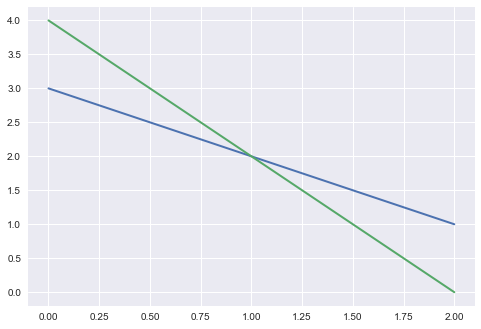

In [27]:
A = np.array([[1, 1],
              [2, 1]])
b = np.array([3, 4])



f1 =  lambda x: 3 - x
f2 =  lambda x: 4 - 2 * x
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
ax.plot(x, f1(x) , linewidth= 2)
ax.plot(x, f2(x) , linewidth= 2)

In [13]:
A = np.array([[0, 1],
              [0, 2]])
b = np.array([3, 4])

print(np.linalg.det(A))
# print(np.linalg.solve(A, b))

# ##### How to show this graphically?
# f1 =  lambda x: 3 
# f2 =  lambda x: 4 / 2
# x = np.linspace(0, 2, 100)
# fig, ax = plt.subplots()
# ax.plot(x, f1(x) , linewidth= 2)
# ax.plot(x, f2(x) , linewidth= 2)


0.0


--------------------------------------------------------------------------------------------------------------------------------

## Solving Triangular Linear Systems

For the remainder of this class, we focus on SLEs with square matrices. In order to derive the most popular approach to solving general SLEs, we first look at how to solve *triangular* SLEs.

#### Forward substitution

Suppose $A$ is an *lower triangular* square matrix; hence the SLE has the following form:

\begin{equation}
\begin{split}A x
=
\left[
\begin{array}{ccccc}
    a_{11} & 0 & 0 & \cdots & 0 \\
    a_{21} & a_{22} & 0 & \cdots & 0 \\
    \vdots & \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & a_{n3} &\cdots & a_{nn}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{n}
\end{array}
\right] 
 = 
\left[
\begin{array}{c}
    b_{1}  \\
    \vdots \\
    b_{n} 
\end{array}
\right]
\end{split}
\end{equation} 

It is easy to see that $a_{11} x_1 = b_1$, and hence
\begin{equation}
    x_1 = \frac{b_1}{a_{11}}
\end{equation}

Second, we have $a_{21} x_1 + a_{22} x_2 = b_2$, and hence, knowing $x_1$, we can compute $x_2$ as 

\begin{equation}
    x_2 = \frac{b_2 - a_{21}x_1}{a_{22}}
\end{equation}

We can continue this logic all the way to $x_{n}$ (compare Miranda & Fackler, p. 8). A general formula for $x_i$ is given by:

\begin{equation}
    x_i = \frac{b_i - \sum_{j = 1}^{i - 1} a_{ij}x_j}{a_{ii}}
\end{equation}

This way of computing the elements of $x$ in a lower triangular system of equations *recursively* is called **forward-substitution**. It is straightforward to implement in Python:

In [12]:
def forward_sub(A, b):
    """
    Implements the forward-substitution algorithm to solve a lower triangular system of equations
    """
    n, m = A.shape
    
    assert n == m, "A must be a square matrix"
    
    x = np.zeros(n)
    
    for i in range(n):
        
        summ = 0
        for j in range(i):
            summ += A[i, j] * x[j]
        
        x[i] = (b[i] - summ) / A[i, i]   
    
    return x

A = np.array([[1, 0, 0],
              [4, 5, 0],
              [7, 8, 9]])

b = np.array([1, 2, 3]) 

x = forward_sub(A, b)
x

array([ 1.        , -0.4       , -0.08888889])

#### Backward substitution

If $A$ is an *upper triangular matrix*, we can use *backward-substitution*, which works analogously to forward-substitution. I leave both the derivation and numerical implementation to this weeks problem set.

--------------------------------------------------------------------------------------------------------------------------------

### LU Factorization using Gaussian Elimination

Let $L$ denote a *lower triangular* square matrix:
\begin{split}L =
\left[
\begin{array}{ccccc}
    a_{11} & 0 & 0 & \cdots & 0 \\
    a_{21} & a_{22} & 0 & \cdots & 0 \\
    \vdots & \vdots & \vdots & & \vdots \\
    a_{n1} & a_{n2} & a_{n3} &\cdots & a_{nn}
\end{array}
\right]\end{split}
Similarly, let $U$ denote an *upper triangular* square matrix:
\begin{split}U =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots &  & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{array}
\right]\end{split}

Gaussian elimination is an algorithm to factor any square matrix into the form 
\begin{split}
 A = LU,
\end{split}
where $L$ is 

#### Simple Example

As an example, consider a market where the inverse supply function is given by 
\begin{align}
    p^s = c + d q,
\end{align}
and the inverse demand function is given by
\begin{align}
    p^d = a - b q.
\end{align}
In equilibrium, $p^d = p^d = p$, and solving for $q$ gives 
\begin{align}
    q = \frac{a + c}{b - d}.
\end{align}

Note that we can write the market in equilibrium as a system of two linear equations in two unknowns:
\begin{align}
    p + b q &= a \\
    p - d q &= c
\end{align}
or
\begin{split}
\left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right]
=
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{split}
Let 
\begin{split}
A \equiv \left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\end{split}
and recall that $ A = IA$, where $I$ is the identity matrix:
\begin{split}
A = \left[
\begin{array}{cc}
    1 & 0 \\
    0 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    1 & - d \\
\end{array}
\right]
\end{split}

The idea of Gaussian elimination is to start with this expression and then go through each column of $A$, transforming it such that the elements below the diagonal are zero. In this simple example, there is only one step: we need to transform the first column of $A$. We can do this by subtracting $1$ times the first row from the second row, which gives us an upper triangular matrix $U$:
\begin{split}
 U = \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right]
\end{split}

In order to keep the equality above, we update the identity matrix by the coefficient $1$:
\begin{split}
A = \left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right] \equiv LU
\end{split}
It is easy to verify that the equality still holds.


This was a very easy example for Gaussian elimination. A more complicated example for a 4-by-4 matrix can be found in M&F, ch. 1.

Why is it useful to write $A$ as $LU$, and hence what is the use of Gaussian elimination? Going back to our system of linear equations, let's make the following substitutions:
\begin{equation}
Ax = LUx = L(Ux) = Ly = b
\end{equation}
As we will see, this is easy to solve. Start with $Ly = b$. In our example above:
\begin{split}
\left[
\begin{array}{cc}
    1 & 0 \\
    1 & 1 \\
\end{array}
\right] \left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    a \\
    c \\
\end{array}
\right]
\end{split}
From this, it is easy to see that $y_1 = a$ and
\begin{split}
    y_1 + y_2 = c\ \Rightarrow\ y_2 = c - a.
\end{split}

Hence, we have a solution for $y$ above. Recall that we had defined $Ux = y$ or
\begin{equation}
 \begin{split}
\left[
\begin{array}{cc}
    1 & b \\
    0 & - d - b \\
\end{array}
\right] \left[
\begin{array}{c}
    p \\
    q \\
\end{array}
\right] = 
\left[
\begin{array}{c}
    y_1 \\
    y_2 \\
\end{array}
\right] =
\left[
\begin{array}{c}
    a \\
    c - a \\
\end{array}
\right]
\end{split}
\end{equation}

From this, it follows that
\begin{split}
q  (- d - b) = c - a
\end{split}
and
\begin{split}
p + bq = a.
\end{split}
Rearranging gives the solution
\begin{split}
q  = \frac{a - c}{b + d}, \ p = a - b \frac{a - c}{b + d}.
\end{split}


### PA = LU Factorization

TBA (example notes)


Compared to the algorithm in Miranda & Fackler, p. 11 ff., 

#### In Python

Example Script p. 65

In [36]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])

pl, u = scipy.linalg.lu(A, permute_l=True)
print(pl )
print( u )

pl:  [[ 0.14285714  1.          0.        ]
 [ 0.57142857  0.5         1.        ]
 [ 1.          0.          0.        ]]
[[ 7.          8.          9.        ]
 [ 0.          0.85714286  2.71428571]
 [ 0.          0.         -0.5       ]]


Using Numpy's **allclose** function, we can easily check whether the product $pl \cdot u$ is identical to $A$:

In [30]:
np.allclose(pl @ u, A)

True

Note that the matrix **pl** as returned by **scipy.linalg.lu** equals, in the notation above, $P^{-1} L$, as we can easily verify:

In [34]:
P_inv = np.linalg.inv([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])
L = np.array([[ 1.        ,  0.        ,  0.        ],
            [ 0.14285714,  1.        ,  0.        ],
            [ 0.57142857,  0.5       ,  1.        ]
        ]) 

np.allclose(Q @ L , pl)

True

--------------------------------------------------------------------------------------------------------------------------------

## Solving a system of linear equations in Python

All the steps above - LU Factorization using Gaussian elimination, forward- and backward substitution - are implemented in one Python function, Scipy's **linalg.solve** function. Here are some examples:

In [37]:
a, b, c, d = 5, 0.4, 0, 0.3

A = np.array([[1, b], [1, -d]])
x = np.array([[a], [c]])

scipy.linalg.solve(A, x)

array([[ 2.14285714],
       [ 7.14285714]])

In [33]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([1, 2, 3]) 

np.linalg.solve(A, b)

array([ -3.33333333e-01,   6.66666667e-01,   3.17206578e-17])

To illustrate that LU factorization is a faster way to solve a SLE for large matrices than using the inverse, we can use Numpy's **random.uniform** function to create a large ($n = 500$) square matrix $A$ and vector $b$, both with random elements (here between 0 and 5). A quick way to measure the running time of a piece of code is Jupyter notebook's **%%timeit** "magic". 

In [75]:
A = np.random.uniform(0,5,(500,500))
b = np.random.uniform(0,5,500)

In [76]:
%timeit -r1 -n1 np.linalg.solve(A, b)

1 loop, best of 1: 8.97 ms per loop


In [77]:
%timeit -r1 -n1 scipy.linalg.solve(A, b)

1 loop, best of 1: 11.5 ms per loop


In [78]:
%timeit -r1 -n1 np.linalg.inv(A) @ b

1 loop, best of 1: 75 ms per loop


--------------------------------------------------------------------------------------------------------------------------------

## Ill-conditioned Matrices

In [52]:
for n in [5, 10, 15]:
    ## define matrix
    A = np.array([i**(n - j) for i in range(1,n+1) for j in range(1, n+1)] )
    A.shape = (n, n)
    ## 
    b = A @ np.ones(n)
    ## solve SLE
    x = np.linalg.solve(A, b)
    
    print("For n = {}, x = {}".format(n, x))
    print("For n = {}, the condition number is {}".format(n, np.linalg.cond(A)))
    print("--------------------------------------------------------------------")

For n = 5, x = [ 1.  1.  1.  1.  1.]
For n = 5, the condition number is 26169.687970635157
--------------------------------------------------------------------
For n = 10, x = [ 1.          1.          1.          1.          0.99999998  1.00000011
  0.99999969  1.00000052  0.99999952  1.00000017]
For n = 10, the condition number is 2106257537077.9387
--------------------------------------------------------------------
For n = 15, x = [   1.            1.00000002    0.99999878    1.00003617    0.99928559
    1.00995779    0.89922925    1.75005363   -3.1126587    17.46593894
  -46.15368315   94.07707031 -117.73812596   87.6464385   -25.84354115]
For n = 15, the condition number is 2.582411040399407e+21
--------------------------------------------------------------------


In [21]:
np.linalg.cond(A)

26169.687970635157

In [28]:
np.linalg.norm(np.eye(2))

1.4142135623730951

In [29]:
A = np.eye(3)
A[1,1] = 3/2
A[2,2] = 3/2
np.linalg.norm(A)

2.3452078799117149

--------------------------------------------------------------------------------------------------------------------------------

## Iterative Methods

Many important algorithms in numerical analysis, some of which we will learn about during this course, are based on  *iteration*. The basic idea of iterative methods is generate a sequence of approximations to the object of interest, in case of SLEs the solution vector $x$. Ideally, these approximations become more and more precise with an increasing number of iterations. However, it is important to emphasize that iterative methods, in contrast to direct methods like solving SLEs with LU factorization, do not yield an exact solution.

On a very general level, iterative methods can be formalized by the following iteration rule:
\begin{equation}
    x^{(k+1)} = g( x^{(k)} ).
\end{equation}
$k$ here is an indicator counting the number of iterations. Hence, in words, the value for $x$ in the $k+1$-iteration is obtained by applying function $g$ on the value for $x$ in the $k$-iteration. Naturally, the functional form of $g$ depends on the problem you want analyze. 

For more concreteness, let us go back to the solving the SLE. Starting at $Ax = b$, first note that rearranging and adding $Qx$ on both sides, where $Q$ is also a square matrix of order $n$ gives:

\begin{equation}
    Qx = Qx + b - Ax\ \Rightarrow \ Qx = b + (Q - A)x
\end{equation}

Multiplying both sides with the inverse of $Q$, we get:

\begin{equation}
    x = Q^{-1} b + (I - Q^{-1} A)x
\end{equation}

This will be our iteration rule. In other words, the function $g$ above is given by the RHS, $Q^{-1} b + (I - Q^{-1} A)x$, and hence

\begin{equation}
    x^{(k+1)} = g( x^{(k)} ) = Q^{-1} b + (I - Q^{-1} A)x^{(k)}.
\end{equation}

Recall that taking the inverse of a matrix can be computationally demanding, in particular for large matrices. Hence, in order for this iteration rule to be useful, we need $Q$ to be easily invertible. One way to achieve is to require $Q$ to be diagonal or triangular. This is the idea of the **Gauss-Jacobi** and **Gauss-Seidel** methods, respectively:
- the Gauss-Jacobi method set $Q$ equal to to a diagonal matrix with the diagonal elements of $A$; 
- the Gauss-Seidel method forms $Q$ from upper triangular elements of $A$. 

In Python, the **diag** and **triu** functions are useful when implementing these algorithms (the former has to applied twice):

In [85]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])
Q = np.diag( np.diag(A) )
print(Q)

[[1 0 0]
 [0 5 0]
 [0 0 9]]


In [84]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])
Q = np.triu(A)
print(Q)

[[1 2 4]
 [0 5 6]
 [0 0 9]]


The following piece of code implements the Gauss-Seidel method:

In [100]:
def gauss_seidel(A, b, x0):
    """ 
    Implements the Gauss-Seidel method with a over-relaxation parameter
    """
    eps = 1
    tol = 1e-8
    it = 0
    maxit = 100

    x = x0
    Q = np.triu(A)
    Q_inv = np.linalg.inv(Q)
    
    while eps > tol and it < maxit:
        it += 1 
        x_new = Q_inv @ b + ( np.eye(len(b)) - Q_inv @ A) @ x
        eps = np.linalg.norm(x_new - x)
        x = x_new
        
    return x        

[ 0.04275093  0.08085502  0.10269517]


In [102]:
A = np.array([[1, 2, 4],
              [4, 5, 6],
              [7, 8, 9]])
x0 = np.array([-0.33, 0.66, 0]) 
b = np.array([1, 2, 3]) 

print( gauss_seidel(A, b, x0) )

[ -1.33439602e+44  -9.47028130e+42   3.80950410e+43]


Applying the Gauss-Seidel method on our example from above, we see that the algorithm does not converge, even if we choose an initial $x$ close to the exact solution (which we know in this case). This is a drawback of using iterative methods: convergence to a good approximation is no guarantueed.

In the case of solving an SLE, it can be shown that we get convergence if the following condition holds:

\begin{equation}
    || I - Q^{-1} A || < 1.
\end{equation}

For now, we do not look at why this is a case, but just this property as a given. We can evaluate this expression for our example and find that the condition is not satisfied:

In [103]:
print( np.linalg.norm(np.eye(len(b)) - np.linalg.inv(np.triu(A)) @ A) )

3.55867918347


To consider an example where convergence is guarantueed, *independent from the starting value for* $x$, modify $A$ by increasing the elements on the diagonal (cp. Miranda and Fackler for why this works):

In [106]:
A = np.array([[10, 2, 4],
              [4, 15, 6],
              [7, 8, 20]])

np.linalg.norm(np.eye(len(b)) - np.linalg.inv(np.triu(A)) @ A)

0.60651756409485424

The condition above is satisfied; applying the Gauss-Seidel algorithm finds a solution: 

In [105]:
x0 = np.array([1, 1, 1]) 
b = np.array([1, 2, 3]) 
print( gauss_seidel(A, b, x0) )

[ 0.04275093  0.08085502  0.10269517]


You can verify that this solution is found for different values for the starting value **x0**. 

When should you use iterative methods rather than computing an exact solution to a SLE? A rule of thumb is for large matrices, in particular if they are sparse, iterative methods may be a faster way to find $x$. For this course, all problems that involve solving a SLE will be of moderate size, hence LU factorization will do fine.

--------------------------------------------------------------------------------------------------------------------------------

## How are numbers stored

In [51]:
import sys
sys.getsizeof(3210.48)

24

In [52]:
bin(257)

'0b100000001'

In [53]:
(1e-20 + 1) - 1

0.0

In [55]:
1e-20 + (1 - 1)

1e-20

In [97]:
format(0.1, '.20f')

'0.10000000000000000555'

In [60]:
np.float64(0.1).view(np.int64)

4591870180066957722

In [138]:
f, d = (0.1).as_integer_ratio()
e = int( np.log(d)/np.log(2) )
format(f / 2**e, '.20f')
f, e

(3602879701896397, 55)

In [141]:
type(e)

int

More information:
https://docs.python.org/3/tutorial/floatingpoint.html
https://stackoverflow.com/questions/4838994/float-to-binary

In [85]:
f, d = (1e-20).as_integer_ratio()
e = int( math.log(d)/math.log(2) )
format(f / 2**e, '.20f')
print(f, e)

6646139978924579 119


In [92]:
len(bin(f))

55

In [91]:
bin(e)

'0b1110111'

In [96]:
bin(f)

'0b10111100111001010000100001100100100100100001000100011'

In [43]:
def float_to_bin(x):
    if x == 0:
        return "0" * 64
    w, sign = (float.hex(x), 0) if x > 0 else (float.hex(x)[1:], 1)
    mantissa, exp = int(w[4:17], 16), int(w[18:])
    print((mantissa / 2**52 + 1) * 2**exp)
    print(mantissa)
    print(exp + 1023)
    return "{}{:011b}{:052b}".format(sign, exp + 1023, mantissa)

float_to_bin(-3210.48)

3210.48
2556320554114089
1034


'1100000010101001000101001111010111000010100011110101110000101001'

In [45]:
f, e = 2556320554114089, 11253
print(f + 2**52)
print(2**(-1034 + 1075))

7059920181484585
2199023255552


In [22]:
f, d = (-3210.48).as_integer_ratio()
e = int( np.log(d)/np.log(2) )
format(f / 2**e, '.20f')
print(f)
print(d)
# print( bin(e) + bin(f))

-7059920181484585
2199023255552


In [23]:
f/d

-3210.48

In [37]:
bin(2048)

'0b100000000000'

In [110]:
format(bin(1), 'f')

ValueError: Unknown format code 'f' for object of type 'str'

In [132]:
len(bin(f)[3:])

53

In [135]:
bin(e)[2:]

'101001'

In [136]:
f

-7059920181484585

In [48]:
bin(256)

'0b100000000'

In [53]:
bin(15)

'0b1111'

In [54]:
hex(15)

'0xf'

In [55]:
0xff

255

In [56]:
type(9223372036854775808)

int

In [57]:
9223372036854775808

9223372036854775808

In [102]:
0b1111111111111111111111111111111111111111111111111111111111111111111111111111

37778931862957161709567

In [66]:
bin(18446744073709551616)

'0b10000000000000000000000000000000000000000000000000000000000000000'

In [70]:
sys.getsizeof(18446744073709551615)

36

In [71]:
sys.getsizeof(18446744073709551616)

36

In [72]:
sys.getsizeof(1)

28

In [74]:
len(bin(1)) - 2

1

In [75]:
len(bin(18446744073709551616)) - 2

65

In [124]:
len(bin(1237940039285380274899124224)) - 2

90

In [125]:
sys.getsizeof(1237940039285380274899124224)

40

In [131]:
len(float_to_bin(-1237940039285380274899323124224.4574857))

1.2379400392853803e+30
4292493394837504
1122


64

In [132]:
sys.getsizeof(-1237940039285380274899323124224.4574857)

24

In [133]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [136]:
sys.getsizeof(2.7976931348623158e+308)

24

In [141]:
print(float_to_bin(1.7976931348623156e+308))
print(float_to_bin(1.7976931348623157e+308))
print(float_to_bin(1.7976931348623158e+308))

1.7976931348623155e+308
4503599627370494
2046
0111111111101111111111111111111111111111111111111111111111111110
1.7976931348623157e+308
4503599627370495
2046
0111111111101111111111111111111111111111111111111111111111111111
1.7976931348623157e+308
4503599627370495
2046
0111111111101111111111111111111111111111111111111111111111111111


In [144]:
0b11111111110

2046